# Modul 9 Praktikum Sains Data: Pengantar PyTorch

Kembali ke [Sains Data](./saindat2024genap.qmd)

Ini adalah pertemuan terakhir praktikum Sains Data tahun ini.

Di dua pertemuan sebelumnya, kita sudah membahas tentang *neural network* dan *deep learning* dengan TensorFlow dan Keras. Dari segi materi mata kuliah Sains Data, sebenarnya kita sudah selesai.

Namun, di awal [Modul 7](./modul7.ipynb), telah disebutkan bahwa ada dua *framework* utama yang umum digunakan untuk *deep learning* di Python, yaitu TensorFlow (dengan Keras) dan PyTorch.

Agar wawasan kita lebih luas dan tidak terbatas satu *framework* saja, tidak ada salahnya kita coba mempelajari PyTorch juga :)

Lagipula, untuk riset/penelitian di dunia *deep learning*, saat ini PyTorch jauh lebih sering digunakan dibandingkan TensorFlow:

![(Gambar tren November 2014 hingga April 2024: dari semua implementasi atau kode yang telah dibuat untuk paper *deep learning*, berapa persen menggunakan *framework* tertentu. Pada April 2024, persentase PyTorch lebih dari 50%, sedangkan persentase TensorFlow kurang dari 10%.)](./gambar/paperswithcode_nov14_apr24.png)

Gambar tren November 2014 hingga April 2024: dari semua implementasi atau kode yang telah dibuat untuk paper *deep learning*, berapa persen menggunakan *framework* tertentu. Pada April 2024, persentase PyTorch lebih dari 50%, sedangkan persentase TensorFlow kurang dari 10%.

Kalian bisa *explore* di *link* berikut: <https://paperswithcode.com/trends>

Apabila sewaktu-waktu kalian ingin menjalani skripsi atau semacamnya di dunia *deep learning*, atau setidaknya ingin membaca riset terbaru, kami harap wawasan tentang PyTorch ini bermanfaat.

::: {.callout-note}
## Tentang urutan materi

Kami sengaja mengajarkan TensorFlow dan Keras terlebih dahulu, baru mengajarkan PyTorch, karena penulisan kode di PyTorch mirip dengan penggunaan *subclassing API* di Keras.

:::

Sebelum kita mulai, instal terlebih dahulu PyTorch, dengan menginstal `torch` dan `torchvision`

In [ ]:
pip install torch torchvision

- `torch` adalah PyTorch.
- `torchvision` menyediakan fitur-fitur yang membantu ketika berurusan dengan gambar, bahkan seperti sudah menjadi bagian yang tidak terpisahkan dari `torch`.
- Sebenarnya ada juga `torchaudio` yang membantu ketika berurusan dengan data suara. Boleh saja kalian instal juga:

    `pip install torch torchvision torchaudio`

Terkait penginstalan PyTorch, kalian bisa membaca lebih lanjut di sini: <https://pytorch.org/get-started/locally/>

Kalau sudah instal, jangan lupa *import*:

In [1]:
import torch, torchvision

Kita bisa lihat versinya (mungkin di kalian akan lebih baru):

In [77]:
print(torch.__version__)

2.1.0


In [78]:
print(torchvision.__version__)

0.16.0


Jangan lupa *import* juga *library* yang biasa kita gunakan:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Mengenal PyTorch

### CPU, GPU, dan *device-agnostic code*

Tiap komputer bisa memiliki kekuatan yang berbeda, termasuk ada/tiadanya komponen yang bernama GPU.

Tiap komputer pasti punya yang namanya CPU atau *Central Processing Unit*, yang biasanya menjadi pusat segala komputasi di komputer itu, sesuai namanya.

Namun, untuk perhitungan dengan matriks, tensor atau semacamnya, GPU atau *Graphics Processing Unit* lebih cepat. Perhitungan seperti itu biasa dilakukan untuk tampilan atau *graphics* ketika sedang bermain *game*, dan juga biasa dilakukan ketika berurusan dengan *neural network*.

Sehingga, daripada menggunakan CPU, ada baiknya menggunakan GPU, **kalau ada**.

Di Google Colaboratory, di menu `Runtime > Change runtime type`, di bagian *hardware accelerator*, kalian bisa mengubah *setting*, apakah ingin menggunakan CPU atau GPU. (Bahkan, ada juga TPU atau *tensor processing unit* yang sepertinya lebih dikhususkan lagi untuk komputasi dengan tensor.)

![](./gambar/colabgpu_runtime.png)

![](./gambar/colabgpu_hardware_accelerator.png)

Apapun yang tersedia, **tiap kali kita ingin menggunakan PyTorch,** sebaiknya kita beritahu, mana yang ingin kita gunakan. Agar tidak berantakan, caranya bisa dengan kode berikut:

In [3]:
# Setup device-agnostic code 
if torch.cuda.is_available():
    device = "cuda" # NVIDIA GPU
elif torch.backends.mps.is_available():
    device = "mps" # Apple GPU
else:
    device = "cpu" # Defaults to CPU if NVIDIA GPU/Apple GPU aren't available

print(f"Using device: {device}")

Using device: cpu


Sumber kode: <https://www.learnpytorch.io/pytorch_cheatsheet/#device-agnostic-code-using-pytorch-on-cpu-gpu-or-mps>

*Output* nya akan sesuai dengan pilihan terbaik yang ada, antara CPU atau GPU. Kebetulan, modul ini di-*render* di laptop yang hanya memiliki CPU.

Kode di atas sebenarnya hanya menyimpan pilihan tersebut sebagai *string* ke dalam variabel `device`. Namun, variabel ini nantinya akan digunakan selama berurusan dengan PyTorch.

Sehingga, apabila kita ingin ganti dari CPU ke GPU atau sebaliknya, kita tinggal mengubah isi variabel `device` ini (misalnya menggunakan kode di atas), tidak perlu mengubah kode PyTorch yang sudah kita buat.

Dengan demikian, kode PyTorch yang sudah kita buat menjadi tidak tergantung *device* yang digunakan (apakah CPU atau GPU), atau disebut *device-agnostic*.

### Tensor

Seperti di TensorFlow, di PyTorch juga ada tensor. Cara membuatnya adalah dengan `torch.tensor`

Contohnya, skalar:

In [10]:
tensor0 = torch.tensor(1.5)

In [11]:
print(tensor0)

tensor(1.5000)


In [12]:
print(type(tensor0))

<class 'torch.Tensor'>


Kita bisa melihat dimensinya (rank/dimensi tensor) melalui `.ndim`

In [13]:
print(tensor0.ndim)

0


Tipe datanya berupa `torch.tensor` tapi kita bisa memperoleh nilai skalarnya dengan `.item()`

In [15]:
tensor0.item()

1.5

In [16]:
type(tensor0.item())

float

Contoh lain, array/vektor:

In [8]:
tensor1 = torch.tensor([2.31, 4.567, 8.9])

In [9]:
print(tensor1)

tensor([2.3100, 4.5670, 8.9000])


In [10]:
print(tensor1.ndim)

1


Selain dimensi tensor, ada juga `.shape` yang di sini melambangkan ukuran array/vektor, seperti `.shape` di numpy

In [11]:
print(tensor1.shape)

torch.Size([3])


Nilai suatu elemen di tensor juga bisa diubah:

In [ ]:
tensor1[0] = 52.5

In [ ]:
print(tensor1)

tensor([52.5000,  4.5670,  8.9000])


Ada juga tipe data:

In [16]:
print(tensor1.dtype)

torch.float32


Seperti tensor di TensorFlow, tensor di PyTorch juga biasanya menggunakan bilangan *float* yang 32-bit daripada 64-bit.

Contoh lagi, matriks:

In [3]:
mat1 = torch.tensor([
    [1, 2.718, 3.14],
    [4, 5, 6.28]
])

In [4]:
print(mat1)

tensor([[1.0000, 2.7180, 3.1400],
        [4.0000, 5.0000, 6.2800]])


In [5]:
print(mat1.ndim)

2


In [6]:
print(mat1.shape)

torch.Size([2, 3])


Kita bisa buat matriks kedua, lalu mengalikannya dengan perkalian matriks menggunakan `torch.matmul`

In [19]:
mat2 = torch.tensor([
    [9, 8],
    [7, 6],
    [5, 4.3]
])

In [23]:
print(mat2.ndim)
print(mat2.shape)
print(mat2.dtype)

2
torch.Size([3, 2])
torch.float32


In [21]:
mat3 = torch.matmul(mat1, mat2)

In [22]:
print(mat3)

tensor([[ 43.7260,  37.8100],
        [102.4000,  89.0040]])


Matriks juga bisa ditranspos dengan `.T`

In [38]:
mat4 = mat3.T
print(mat4)

tensor([[ 43.7260, 102.4000],
        [ 37.8100,  89.0040]])


### Konversi dari/ke numpy

Kita bisa mengonversi tensor PyTorch menjadi array numpy dan sebaliknya:

- `.numpy()` untuk mengubah suatu tensor PyTorch menjadi array numpy

- `torch.from_numpy(...)` untuk mengubah suatu array numpy menjadi tensor PyTorch

In [43]:
arr5 = mat4.numpy()
print(arr5)
print(type(arr5))
print(arr5.dtype)

[[ 43.725998 102.4     ]
 [ 37.809998  89.004   ]]
<class 'numpy.ndarray'>
float32


In [42]:
mat6 = torch.from_numpy(arr5)
print(mat6)
print(type(mat6))
print(mat6.dtype)

tensor([[ 43.7260, 102.4000],
        [ 37.8100,  89.0040]])
<class 'torch.Tensor'>
torch.float32


### ones, zeros, rand, randn

Kita bisa membuat tensor berisi satu semua, atau nol semua, atau nilai random, dengan ukuran `size` yang bisa kita tentukan

In [26]:
x = torch.ones(size = (3,4))
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [25]:
x = torch.zeros(size = (3,4))
print(x)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [28]:
x = torch.rand(size = (3,4))
print(x)

tensor([[0.0698, 0.2004, 0.3279, 0.2525],
        [0.2461, 0.4263, 0.4870, 0.4371],
        [0.9545, 0.7487, 0.3990, 0.0412]])


`torch.rand` memilih nilai secara random dari distribusi uniform pada interval $[0,1)$

Untuk memilih nilai secara random dari distribusi normal (dengan $\mu = 0$ dan $\sigma = 1$), gunakan `torch.randn`

In [68]:
x = torch.randn(size = (3,4))
print(x)

tensor([[ 1.5820, -0.1806,  0.1820, -0.6891],
        [ 1.2161, -0.5755, -0.5172, -0.7454],
        [ 0.3047, -0.5932, -0.3343, -1.1461]])


### Operasi tensor seperti numpy

Secara umum, operasi tensor di PyTorch memang mirip dengan array di numpy, sebagaimana operasi tensor di TensorFlow juga mirip dengan array di numpy.

In [29]:
a = 4 * torch.ones((2, 2))
print(a)

tensor([[4., 4.],
        [4., 4.]])


In [30]:
b = torch.square(a)
print(b)

tensor([[16., 16.],
        [16., 16.]])


In [31]:
c = torch.sqrt(a)
print(c)

tensor([[2., 2.],
        [2., 2.]])


In [32]:
d = b + c
print(d)

tensor([[18., 18.],
        [18., 18.]])


In [34]:
# perkalian matriks
e = torch.matmul(a, c)
print(e)

tensor([[16., 16.],
        [16., 16.]])


In [35]:
# perkalian per elemen
e *= d
print(e)

tensor([[288., 288.],
        [288., 288.]])


In [36]:
# penjumlahan per elemen
f = e + 2
print(f)

tensor([[290., 290.],
        [290., 290.]])


### *Autograd* dengan `.backward()`

Sebagaimana ada *automatic differentiation* atau *autodiff* di TensorFlow, ada juga autograd di PyTorch. Namun, *syntax* nya cukup berbeda.

Caranya, inputnya kita jadikan tensor dengan parameter `requires_grad=True`, lalu kita operasikan (misal dengan fungsi f) dan menghasilkan tensor baru, lalu di tensor baru ini kita panggil `.backward()` agar turunan f dihitung dan disimpan di variabel input `.grad`

Contohnya, turunan $x^3$ terhadap $x$ di $x=4$ adalah $3(4)^2 = 48$.

In [46]:
# siapkan input, dengan requires_grad=True
x = torch.tensor(4.0, requires_grad=True)

# hitung fungsi F
F = x**3

# jalankan perhitungan turunan F (terhadap input)
F.backward()

# tampilkan turunan yang tersimpan di input .grad
print(x.grad)

tensor(48.)


Nama *method* nya adalah `.backward()` dan memang digunakan di *backward pass* (akan kita lihat nanti).

Contoh lain, turunan $3x^3 - y^2$ terhadap $x$ dengan $x=2$ adalah $9(2)^2 = 36$, dan turunannya terhadap $y$ dengan $y=6$ adalah $-2(6) = -12$

In [49]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(6.0, requires_grad=True)

F = 3 * x**3 - y**2

F.backward()

print(x.grad)
print(y.grad)

tensor(36.)
tensor(-12.)


## Klasifikasi biner dengan *perceptron*

### Persiapan data, `TensorData`, `DataLoader`

Untuk model pertama kita, mari kita coba buat kembali model *perceptron* untuk klasifikasi biner yang pernah kita buat di [Modul 7](./modul7.ipynb), dengan dataset `titik_negatif_positif.csv` yang sama, bisa kalian *download* dari GitHub Pages ini: [titik_negatif_positif.csv](./titik_negatif_positif.csv)

Kita buka datasetnya, jangan lupa dengan `dtype="float32"` karena itulah tipe data yang biasa digunakan oleh PyTorch, seperti TensorFlow:

In [81]:
titik_df = pd.read_csv("./titik_negatif_positif.csv", dtype="float32")

In [82]:
titik_df

,x,y,kelas
0,1.173375,4.570637,0.0
1,0.195961,3.504604,0.0
2,0.121400,2.163783,0.0
3,-1.170182,3.882771,0.0
4,-0.424403,0.534641,0.0
...,...,...,...
1995,2.423160,-0.337196,1.0
1996,1.949836,-0.627813,1.0
1997,2.109928,-0.382492,1.0
1998,4.178664,0.486168,1.0


Memisahkan antara inputs (prediktor) dan targets (variabel target):

In [83]:
titik_inputs_df = titik_df.drop(columns=["kelas"])
titik_targets_df = titik_df[["kelas"]]

In [84]:
titik_inputs_df

,x,y
0,1.173375,4.570637
1,0.195961,3.504604
2,0.121400,2.163783
3,-1.170182,3.882771
4,-0.424403,0.534641
...,...,...
1995,2.423160,-0.337196
1996,1.949836,-0.627813
1997,2.109928,-0.382492
1998,4.178664,0.486168


In [85]:
titik_targets_df

,kelas
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1995,1.0
1996,1.0
1997,1.0
1998,1.0


Mengubahnya menjadi *array* numpy:

In [86]:
titik_inputs_arr = titik_inputs_df.to_numpy()
titik_targets_arr = titik_targets_df.to_numpy()

Kemudian mengubahnya menjadi tensor PyTorch:

In [87]:
titik_inputs_tensor = torch.from_numpy(titik_inputs_arr)
titik_targets_tensor = torch.from_numpy(titik_targets_arr)

Tujuan mengubah dari DataFrame menjadi tensor, tentunya supaya bisa diproses dengan PyTorch.

Kita bisa periksa, bentuknya sesuai:

In [88]:
print(titik_inputs_tensor)

tensor([[ 1.1734,  4.5706],
        [ 0.1960,  3.5046],
        [ 0.1214,  2.1638],
        ...,
        [ 2.1099, -0.3825],
        [ 4.1787,  0.4862],
        [ 2.3264,  1.2282]])


In [89]:
print(titik_targets_tensor)

tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]])


Kemudian, kita bisa melakukan *train-validation-test split*, misalnya dengan rasio 80:10:10

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# data utuh menjadi data train 80% dan data "test" 20%
titik_X_train, titik_X_test, titik_y_train, titik_y_test = train_test_split(
    titik_inputs_tensor, titik_targets_tensor, test_size=0.2, random_state=42
)

# data "test" dibagi dua, menjadi data validation dan data test sesungguhnya
titik_X_val, titik_X_test, titik_y_val, titik_y_test = train_test_split(
    titik_X_test, titik_y_test, test_size=0.5, random_state=42
)

Kita bisa periksa ukurannya, rasionya sudah sesuai yang kita tetapkan:

In [92]:
print(titik_X_train.shape)
print(titik_X_val.shape)
print(titik_X_test.shape)

torch.Size([1600, 2])
torch.Size([200, 2])
torch.Size([200, 2])


Sebelum dataset kita benar-benar siap untuk diproses dengan PyTorch, ada dua hal yang perlu kita lakukan:

1. mengubahnya menjadi objek `Dataset` dengan `TensorDataset`

    `Dataset` di sini adalah format dataset umum yang dikenal oleh PyTorch.

2. mengubah objek `Dataset` menjadi objek `DataLoader`

    `DataLoader` membuat objek `Dataset` menjadi *"iterable"* yaitu bisa diiterasikan dengan *for loop*, agar bisa digunakan dalam proses *training* maupun *testing*.

Baik `TensorDataset` maupun `DataLoader` bisa kita import dari `torch.utils.data`

In [93]:
from torch.utils.data import TensorDataset, DataLoader

Masing-masing dari data train, data validation, dan data test bisa kita ubah menjadi objek `Dataset` dengan menentukan mana prediktor dan mana target:

In [94]:
titik_train_dataset = TensorDataset(titik_X_train, titik_y_train)
titik_val_dataset = TensorDataset(titik_X_val, titik_y_val)
titik_test_dataset = TensorDataset(titik_X_test, titik_y_test)

Kemudian, masing-masing bisa kita ubah menjadi `DataLoader`, sekasligus menentukan *batch size*, dan juga menentukan apakah perlu ada *shuffling* di tiap epoch (biasanya dilakukan di data *train* untuk mengurangi *overfitting*):

In [95]:
titik_train_dataloader = DataLoader(titik_train_dataset, batch_size=32, shuffle=True)
titik_val_dataloader = DataLoader(titik_val_dataset, batch_size=32, shuffle=False)
titik_test_dataloader = DataLoader(titik_test_dataset, batch_size=32, shuffle=False)

### Menyusun model

Ingat bahwa *perceptron* yang ingin kita susun hanya terdiri dari

- *input layer* dengan dua *neuron*,

- tidak ada *hidden layer*,

- *output layer* dengan satu *neuron* dan fungsi aktivasi sigmoid

Sehingga matriks bobot yang sesuai berukuran $2 \times 1$, dan vektor bias yang sesuai berukuran $1 \times 1$.

Di PyTorch, tiap model berupa *class* dengan ketentuan:

- meng-*inherit* dari `torch.nn.Module` (yaitu *base class* untuk semua model PyTorch)

- baris pertama di *constructor* `__init__` adalah

    `super().__init__()`

- harus mendefinisikan `forward()` untuk *forward pass*

- komponen/variabel/atribut/parameter yang diperlukan biasanya didefinisikan di *constructor*

    Catatan: parameter biasa didefinisikan dengan `torch.nn.Parameter` daripada `torch.tensor`

Ini cukup mirip dengan *subclassing API* di Keras, yang meng-*inherit* dari `keras.Model` dan harus mendefinisikan `call()` untuk *forward pass*.

Mari kita susun *perceptron* kita, yang memiliki matriks bobot, vektor bias, dan fungsi aktivasi sigmoid:

In [4]:
class MyPerceptron(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = torch.nn.Parameter(
            torch.randn(size = (2, 1), dtype = torch.float32),
            requires_grad=True # agar autgrad aktif
        )

        self.bias = torch.nn.Parameter(
            torch.randn(size = (1,), dtype = torch.float32),
            requires_grad=True
        )
    
    def forward(self, x):
        return torch.sigmoid(
            torch.matmul(x, self.weights) + self.bias
        )

Kita bisa buat suatu *instance* atau objek dari *class* di atas:

In [5]:
pisah_titik = MyPerceptron()

Ini adalah model yang siap di-*train*. Sebelum *training*, kita bisa memeriksa parameter model (saat ini masih random sesuai `torch.randn`):

In [98]:
list(pisah_titik.parameters())

[Parameter containing:
 tensor([[-0.8412],
         [-1.1300]], requires_grad=True),
 Parameter containing:
 tensor([-0.0640], requires_grad=True)]

Mirip, ada juga yang namanya `.state_dict()`

In [99]:
pisah_titik.state_dict()

OrderedDict([('weights',
              tensor([[-0.8412],
                      [-1.1300]])),
             ('bias', tensor([-0.0640]))])

### Menyiapkan *hyperparameter*

Untuk klasifikasi, *loss function* yang biasa digunakan adalah *crossentropy loss*, atau mungkin lebih spesifiknya *binary crossentropy loss*, yang disebut `torch.nn.BCELoss` di PyTorch. Kita bisa menyiapkannya sebagai objek.

In [14]:
titik_loss_fn = torch.nn.BCELoss()

Serupa, *optimizer* juga disiapkan sebagai objek, misalnya `torch.optim.SGD` untuk SGD *(stochastic gradient descent)*:

In [101]:
titik_opt = torch.optim.SGD(params=pisah_titik.parameters(), # merujuk ke parameter model
                            lr=0.01) # learning rate

### *Training loop*

Mungkin agak mengejutkan: di PyTorch, kita dibebaskan untuk membuat *training loop* sendiri. Artinya, tidak ada fungsi `.fit()` yang tinggal kita panggil; kita perlu menyusun *for loop* sendiri, seperti di [Modul 7](./modul7.ipynb) :)

Ingat kembali, tiap iterasi (yaitu per *batch*) di proses *training* melibatkan:

1. *Forward pass*: menghitung nilai *output* (hasil prediksi) dari *input* (*batch*).

2. Menghitung *loss* antara hasil prediksi dan nilai sebenarnya

3. *Backpropagation*: menghitung gradien dari *loss* terhadap tiap parameter

4. *Update optimizer*: memperbarui nilai parameter berdasarkan gradien dari *loss*, menggunakan rumus atau *optimizer* yang dipilih

Ingat juga, selain *training*, ada juga yang namanya *validation* (atau terkadang disebut *testing* di beberapa sumber). Tahap *validation* ini menguji model di akhir tiap *epoch*, setelah semua *batch* melalui proses *training*. Langkahnya terdiri dari:

1. *Forward pass*

2. Menghitung *loss* dan/atau *accuracy* antara hasil prediksi dan nilai sebenarnya

Perhatikan bahwa *validation* juga bisa dilakukan per *batch*, sehingga kedua langkah di atas dilakukan per *batch*. Kalau begitu, nilai akhir untuk *loss* dan/atau *accuracy* menjadi rata-rata dari nilainya di tiap *batch*.

Penjelasan di atas menjadi kode PyTorch sebagai berikut:

In [13]:
epochs = 10

train_loss_list = []
val_loss_list = []

# untuk tiap epoch,
for epoch in range(epochs):
    # siapkan model untuk tahap training
    pisah_titik.to(device)
    pisah_titik.train()
    sum_train_loss = 0

    # untuk tiap batch,
    for X, y in titik_train_dataloader:
        X = X.to(device)
        y = y.to(device)

        # Forward pass
        y_pred = pisah_titik(X)

        # Hitung loss
        loss = titik_loss_fn(y_pred, y)
        sum_train_loss += loss

        # "Optimizer zero grad": nolkan dulu hasil hitung gradien
        titik_opt.zero_grad()

        # Backpropagation
        loss.backward()

        # Update optimizer, juga disebut "optimizer step"
        titik_opt.step()

    # hitung rata-rata train loss berdasarkan banyaknya batch
    avg_train_loss = sum_train_loss / len(titik_train_dataloader)

    # simpan train loss
    train_loss_list.append(avg_train_loss)

    # siapkan model untuk tahap validaion
    pisah_titik.to(device)
    pisah_titik.eval()
    sum_val_loss = 0

    # selalu digunakan ketika hendak testing
    with torch.inference_mode():
        # untuk tiap batch,
        for X, y in titik_val_dataloader:
            X = X.to(device)
            y = y.to(device)
            
            # Forward pass
            y_pred = pisah_titik(X)

            # Hitung loss
            sum_val_loss += titik_loss_fn(y_pred, y)
        
        # hitung rata-rata val loss berdasarkan banyaknya batch
        avg_val_loss = sum_val_loss / len(titik_val_dataloader)
        
        # simpan val loss
        val_loss_list.append(avg_val_loss)
    
    # tampilkan train loss dan val loss untuk epoch ini
    print(f"Epoch: {epoch} | avg train loss: {avg_train_loss} | avg val loss: {avg_val_loss}")

Epoch: 0 | avg train loss: 1.0023550987243652 | avg val loss: 0.6549612879753113
Epoch: 1 | avg train loss: 0.424757719039917 | avg val loss: 0.3022421300411224
Epoch: 2 | avg train loss: 0.2212503552436828 | avg val loss: 0.1808699667453766
Epoch: 3 | avg train loss: 0.1497089713811874 | avg val loss: 0.1308697611093521
Epoch: 4 | avg train loss: 0.1175468564033508 | avg val loss: 0.1053687334060669
Epoch: 5 | avg train loss: 0.0995666906237602 | avg val loss: 0.0898655503988266
Epoch: 6 | avg train loss: 0.0879358351230621 | avg val loss: 0.0794256925582885
Epoch: 7 | avg train loss: 0.0796592533588409 | avg val loss: 0.0717914551496505
Epoch: 8 | avg train loss: 0.0733261257410049 | avg val loss: 0.0658656656742096
Epoch: 9 | avg train loss: 0.0682612806558609 | avg val loss: 0.061109509319067


Perhatikan bahwa hasil *loss* di tiap *epoch* sudah kita simpan ke dalam list.

In [116]:
print(train_loss_list)
print(val_loss_list)

[tensor(1.0024, grad_fn=<DivBackward0>), tensor(0.4248, grad_fn=<DivBackward0>), tensor(0.2213, grad_fn=<DivBackward0>), tensor(0.1497, grad_fn=<DivBackward0>), tensor(0.1175, grad_fn=<DivBackward0>), tensor(0.0996, grad_fn=<DivBackward0>), tensor(0.0879, grad_fn=<DivBackward0>), tensor(0.0797, grad_fn=<DivBackward0>), tensor(0.0733, grad_fn=<DivBackward0>), tensor(0.0683, grad_fn=<DivBackward0>)]
[tensor(0.6550), tensor(0.3022), tensor(0.1809), tensor(0.1309), tensor(0.1054), tensor(0.0899), tensor(0.0794), tensor(0.0718), tensor(0.0659), tensor(0.0611)]


Maka, kita bisa ubah jadi DataFrame lalu menyimpannya sebagai CSV:

In [114]:
titik_loss_df = pd.DataFrame(
    [
        [loss.item() for loss in train_loss_list],
        [loss.item() for loss in val_loss_list]
    ],
).transpose().rename(columns={0: "train_loss", 1: "val_loss"})

In [115]:
titik_loss_df

,train_loss,val_loss
0,1.002355,0.654961
1,0.424758,0.302242
2,0.221250,0.180870
3,0.149709,0.130870
4,0.117547,0.105369
5,0.099567,0.089866
6,0.087936,0.079426
7,0.079659,0.071791
8,0.073326,0.065866
9,0.068261,0.061110


In [118]:
titik_loss_df.to_csv("./pytorch_titik_loss_df.csv", index=False)

Kalau mau menyamakan dengan modul, kalian bisa *download* melalui GitHub Pages ini: [pytorch_titik_loss_df.csv](./pytorch_titik_loss_df.csv)

Kita bisa import kembali:

In [7]:
pytorch_titik_loss_df = pd.read_csv("./pytorch_titik_loss_df.csv")

Lalu kita bisa plot:

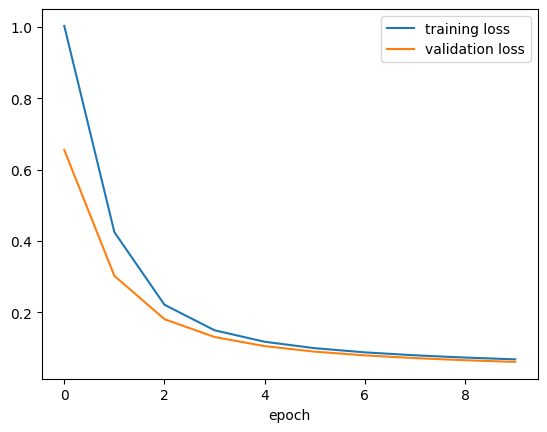

In [120]:
plt.plot(pytorch_titik_loss_df["train_loss"], label = "training loss")
plt.plot(pytorch_titik_loss_df["val_loss"], label = "validation loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

### Prediksi

### Menyimpan parameter model (saja)

Ingat kembali, kita bisa melihat parameter model dengan `.state_dict()`

In [122]:
pisah_titik.state_dict()

OrderedDict([('weights',
              tensor([[ 0.9372],
                      [-1.2340]])),
             ('bias', tensor([0.3439]))])

Kita bisa menyimpan parameter model ke dalam *file* berakhiran `.pth` menggunakan `torch.save`

In [123]:
torch.save(pisah_titik.state_dict(), "./pisah_titik_state.pth")

Apabila ingin *load* kembali, kita perlu membuat *instance* terlebih dahulu...

In [124]:
pisah_titik2 = MyPerceptron()

Barulah kita panggil `.load_state_dict(torch.load(PATH))` seperti berikut:

In [125]:
pisah_titik2.load_state_dict(torch.load("./pisah_titik_state.pth"))

<All keys matched successfully>

Parameternya akan sama:

In [126]:
pisah_titik2.state_dict()

OrderedDict([('weights',
              tensor([[ 0.9372],
                      [-1.2340]])),
             ('bias', tensor([0.3439]))])

### `torch.nn.Linear` dan `torch.nn.Sequential`

In [ ]:
class MyPerceptron_v2(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # satu dense layer dengan fungsi aktivasi linier
        self.linear_layer = torch.nn.Linear(in_features=2, out_features=1)

        # fungsi aktivasi sigmoid
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        x = self.linear_layer(x)
        x = self.sigmoid(x)
        return x

In [ ]:
class MyPerceptron_v3(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # perhatikan: inputnya bukan berupa list, langsung saja tiap layer
        self.layer = torch.nn.Sequential(
            torch.nn.Linear(in_features=2, out_features=1),
            torch.nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.layer(x)
        return x

## Fungsi *train step* dan *val step*

*Training loop* kita terdiri dari dua bagian utama, yaitu tahap *training* dan tahap *validation*. Kita bisa menyusun *training loop* yang telah kita buat dengan lebih rapi, dengan memasukkan tiap tahap ke dalam fungsi yang nantinya tinggal dipanggil. Modifikasi yang dilakukan:

- `pisah_titik` menjadi `model`

- `titik_train_dataloader` menjadi `train_dataloader`

- `titik_val_dataloader` menjadi `val_dataloader`

- `titik_loss_fn` menjadi `loss_fn`

- `titik_opt` menjadi `optimizer`

In [ ]:
def train_step(model, train_dataloader, loss_fn, optimizer, device=device):
    # siapkan model untuk tahap training
    model.to(device)
    model.train()
    sum_train_loss = 0

    # untuk tiap batch,
    for X, y in train_dataloader:
        X = X.to(device)
        y = y.to(device)

        # Forward pass
        y_pred = model(X)

        # Hitung loss
        loss = loss_fn(y_pred, y)
        sum_train_loss += loss

        # "Optimizer zero grad": nolkan dulu hasil hitung gradien
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Update optimizer, juga disebut "optimizer step"
        optimizer.step()

    # hitung rata-rata train loss berdasarkan banyaknya batch
    avg_train_loss = sum_train_loss / len(train_dataloader)

    # sedikit modifikasi: return train loss
    return avg_train_loss

In [ ]:
def val_step(model, val_dataloader, loss_fn, device=device):
    # siapkan model untuk tahap validaion
    model.to(device)
    model.eval()
    sum_val_loss = 0

    # selalu digunakan ketika hendak testing
    with torch.inference_mode():
        # untuk tiap batch,
        for X, y in val_dataloader:
            X = X.to(device)
            y = y.to(device)
            
            # Forward pass
            y_pred = model(X)

            # Hitung loss
            sum_val_loss += loss_fn(y_pred, y)
        
        # hitung rata-rata val loss berdasarkan banyaknya batch
        avg_val_loss = sum_val_loss / len(val_dataloader)
        
        # sedikit modifikasi: return val loss
        return avg_val_loss

Setelah mendefinisikan kedua fungsi di atas, *training loop* menjadi lebih sederhana:

In [ ]:
epochs = 10

train_loss_list = []
val_loss_list = []

# untuk tiap epoch,
for epoch in range(epochs):
    # training step
    avg_train_loss = train_step(
        model = pisah_titik,
        train_dataloader = titik_train_dataloader,
        loss_fn = titik_loss_fn,
        optimizer = titik_opt,
        device = device
    )
    train_loss_list.append(avg_train_loss)

    # validation step
    avg_val_loss = val_step(
        model = pisah_titik,
        val_dataloader = titik_val_dataloader,
        loss_fn = titik_loss_fn,
        device = device
    )
    val_loss_list.append(avg_val_loss)
    
    # tampilkan train loss dan val loss untuk epoch ini
    print(f"Epoch: {epoch} | avg train loss: {avg_train_loss} | avg val loss: {avg_val_loss}")

Bahkan, *training loop* secara keseluruhan bisa kita jadikan fungsi juga.

In [ ]:
def training_loop(
        model, train_dataloader, val_dataloader,
        loss_fn, optimizer, epochs, device = device
    ):

    train_loss_list = []
    val_loss_list = []

    # untuk tiap epoch,
    for epoch in range(epochs):
        # training step
        avg_train_loss = train_step(
            model, train_dataloader,
            loss_fn, optimizer, device=device
        )
        train_loss_list.append(avg_train_loss)

        # validation step
        avg_val_loss = val_step(
            model, val_dataloader,
            loss_fn, optimizer, device=device
        )
        val_loss_list.append(avg_val_loss)
        
        # tampilkan train loss dan val loss untuk epoch ini
        print(f"Epoch: {epoch} | avg train loss: {avg_train_loss} | avg val loss: {avg_val_loss}")
    
    # menyimpan kedua list ke dalam dictionary yang kemudian di-return
    results_dict = {
        "train_loss": [loss.item() for loss in train_loss_list],
        "val_loss": [loss.item() for loss in val_loss_list]
    }
    return results_dict

## Klasifikasi Gambar

Sekarang kita akan mencoba melakukan klasifikasi gambar dengan dataset Fashion MNIST seperti di pertemuan sebelumnya.

### Persiapan data

Langkah pertama adalah menyiapkan data. Untungnya, `DataLoader` untuk Fashion MNIST sudah tersedia di `torchvision.datasets.FashionMNIST` sehingga tinggal kita *download* seperti berikut.

Perkiraan *storage* yang dibutuhkan: 90 MB

Apabila *download* di laptop kalian terlalu pelan, silakan gunakan Google Colaboratory saja, selesai kurang dari 30 detik

In [16]:
fashion_train = torchvision.datasets.FashionMNIST(
    root = "./fashion_data", # folder tempat download
    train = True, # data training
    download = True, # karena belum ada
    # agar file gambar otomatis diubah menjadi tensor
    transform = torchvision.transforms.ToTensor()
)

In [17]:
fashion_val = torchvision.datasets.FashionMNIST(
    root = "./fashion_data", # folder yang sama untuk tempat download
    train = False, # bukan data training
    download = True,
    transform = torchvision.transforms.ToTensor()
)

### Menyusun model

### *Training*

### Prediksi

### Menyimpan parameter model

## Referensi

Internet

- <https://paperswithcode.com/trends>

- <https://pytorch.org/docs/stable/index.html>

Sumber belajar PyTorch, *deep learning*, atau semacamnya, untuk belajar lebih lanjut

- <https://www.learnpytorch.io/>

- Buku *Dive into Deep Learning* (biasa disebut D2L), utamanya menggunakan PyTorch: <https://d2l.ai/>

- Situs bernama *"weights and biases"* (wandb) menyediakan layanan pemantauan proses *training*: <https://wandb.ai/site>